# Pretreatment with Pandas

In [1]:
import pandas

# data file is in the ../resources folder
datas=pandas.read_csv("../resources/irisData.csv")

datas.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2]:
datas.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class of iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Discretization

In [3]:
import numpy
disc=6 # Disc(retization) may be between 2 and 9
r=numpy.array(range(disc+1))/(1.0*disc)

# quantiles are building using pandas.qcut
# The "class" column is just copied.
l=[]
for col in datas.columns.values:
    if col!="class of iris":
        l.append(pandas.DataFrame(pandas.qcut(datas[col],r),columns=[col]))
    else:
        l.append(pandas.DataFrame(datas[col],columns=[col]))
treated=pandas.concat(l, join='outer', axis=1)

treated.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class of iris
0,"(5, 5.4]","(3.4, 4.4]","[1, 1.5]","[0.1, 0.2]",Iris-setosa
1,"[4.3, 5]","(2.9, 3]","[1, 1.5]","[0.1, 0.2]",Iris-setosa
2,"[4.3, 5]","(3, 3.2]","[1, 1.5]","[0.1, 0.2]",Iris-setosa
3,"[4.3, 5]","(3, 3.2]","[1, 1.5]","[0.1, 0.2]",Iris-setosa
4,"[4.3, 5]","(3.4, 4.4]","[1, 1.5]","[0.1, 0.2]",Iris-setosa


In [4]:
#we put the discretized values in a csv file in order to be learned by pyAgrum
treated.to_csv("irisTreated.csv",index=False)

from pyAgrum.lib.utils.oslike import wc_l,head
print("=================================\n  Size of the generated database\n=================================")
wc_l("irisTreated.csv")
print("\n=================================\n  First lines\n=================================")
head("irisTreated.csv")

  Size of the generated database
151

  First lines
sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class of iris
"(5, 5.4]","(3.4, 4.4]","[1, 1.5]","[0.1, 0.2]",Iris-setosa
"[4.3, 5]","(2.9, 3]","[1, 1.5]","[0.1, 0.2]",Iris-setosa
"[4.3, 5]","(3, 3.2]","[1, 1.5]","[0.1, 0.2]",Iris-setosa
"[4.3, 5]","(3, 3.2]","[1, 1.5]","[0.1, 0.2]",Iris-setosa
"[4.3, 5]","(3.4, 4.4]","[1, 1.5]","[0.1, 0.2]",Iris-setosa
"(5, 5.4]","(3.4, 4.4]","(1.5, 2.633]","(0.2, 0.867]",Iris-setosa
"[4.3, 5]","(3.2, 3.4]","[1, 1.5]","(0.2, 0.867]",Iris-setosa
"[4.3, 5]","(3.2, 3.4]","[1, 1.5]","[0.1, 0.2]",Iris-setosa
"[4.3, 5]","(2.7, 2.9]","[1, 1.5]","[0.1, 0.2]",Iris-setosa



# Learning with pyAgrum

In [5]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gum.about()


pyAgrum version 0.9.2.9
(c) Pierre-Henri Wuillemin, Christophe Gonzales, Lionel Torti
    UPMC 2015

    This is free software; see the source code for copying conditions.
    There is ABSOLUTELY NO WARRANTY; not even for MERCHANTABILITY or
    FITNESS FOR A PARTICULAR PURPOSE.  For details, see 'pyAgrum.warranty'.
    


Learned in 0.015827s


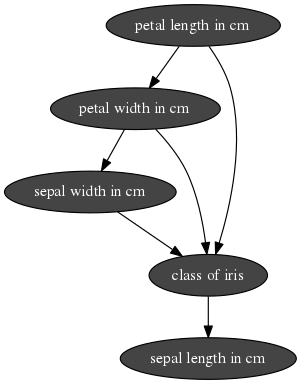

In [6]:
learner=gum.BNLearner("irisTreated.csv")
learner.useLocalSearchWithTabuList()
bn_iris=learner.learnBN()
print("Learned in {0}s".format(learner.currentTime()))
gnb.showBN(bn_iris)

Learned in 0.002693s


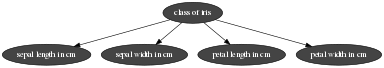

In [7]:
learner=gum.BNLearner("irisTreated.csv")
learner.useGreedyHillClimbing()
bn_iris2=learner.learnBN()
print("Learned in {0}s".format(learner.currentTime()))
gnb.showBN(bn_iris2)

In [8]:
learner.names()

('sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm',
 'class of iris')

In [9]:
print(bn_iris.variableFromName('sepal length in cm'))

sepal length in cm<"(5, 5.4]","[4.3, 5]","(5.4, 5.8]","(6.7, 7.9]","(6.3, 6.7]","(5.8, 6.3]">
